## Dataset Creation

In [ ]:
pip install Faker

In [ ]:
import pandas as pd
import numpy as np
import random
from6 faker import Faker
import uuid

fake = Faker()
n = 10000

# Define distributions
device_types = ["Mobile", "Desktop"]
network_types = ["WiFi", "4G", "None"]
os_versions = ["Android 12", "Android 13", "iOS 15", "iOS 16"]

def generate_row():
    user_id = str(uuid.uuid4())
    device_type = random.choice(device_types)
    location_match = np.random.choice([1, 0], p=[0.8, 0.2])
    app_login_duration = round(np.random.exponential(10), 2)  # avg ~10 minutes
    app_usage_today = round(np.random.normal(60, 30), 2)  # avg ~1 hr, some variance
    payment_amount = round(np.random.uniform(50, 25000), 2)
    transaction_hour = np.random.randint(0, 24)
    past_fraud_flag = np.random.choice([1, 0], p=[0.05, 0.95])  # 5% have fraud
    network_type = random.choice(network_types)
    os_version = random.choice(os_versions)
    battery_level = np.random.randint(5, 100)

    # Logic to determine eligibility for Super OTP
    eligible = int(
        (device_type == "Mobile") and
        (location_match == 1) and
        (app_login_duration >= 5) and
        (app_usage_today >= 20) and
        (battery_level >= 20) and
        (past_fraud_flag == 0) and
        (payment_amount <= 5000) and
        (network_type in ["WiFi", "4G"])
    )

    return [
        user_id, device_type, location_match, app_login_duration,
        app_usage_today, payment_amount, transaction_hour, past_fraud_flag,
        network_type, os_version, battery_level, eligible
    ]

# Generate dataset
data = [generate_row() for _ in range(n)]

# Create DataFrame
columns = [
    "user_id", "device_type", "location_match", "app_login_duration",
    "app_usage_today", "payment_amount", "transaction_hour", "past_fraud_flag",
    "network_type", "os_version", "battery_level", "eligible_for_super_otp"
]
df = pd.DataFrame(data, columns=columns)

# Save to CSV
df.to_csv("super_otp_dataset.csv", index=False)
print("Dataset saved as super_otp_dataset.csv")

Dataset saved as super_otp_dataset.csv


## Model definition

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [ ]:

df = pd.read_csv("super_otp_dataset.csv")
df.drop("user_id", axis=1, inplace=True)
label_encoders = {}
categorical_cols = ["device_type", "network_type", "os_version"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
X = df.drop("eligible_for_super_otp", axis=1)
y = df["eligible_for_super_otp"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

import joblib
joblib.dump(model, "model.pkl")
print("Model saved as model.pkl")

Model saved as model.pkl


In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.999
F1 Score: 0.9767441860465116

Confusion Matrix:
 [[1956    0]
 [   2   42]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1956
           1       1.00      0.95      0.98        44

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



## Feature importance

/tmp/ipython-input-1811855732.py:8: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


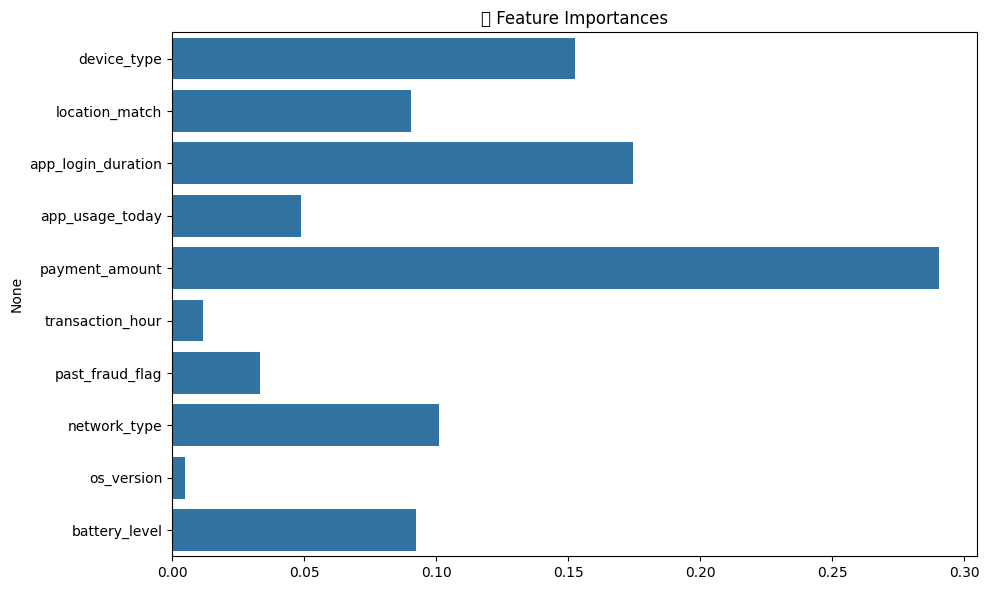

In [ ]:
importances = model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title("🔍 Feature Importances")
plt.tight_layout()
plt.show()